In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/heart/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Explanation of the columns namea

# Data contains;

#     age - age in years
#     sex - (1 = male; 0 = female)
#     cp - chest pain type
#     trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#     chol - serum cholestoral in mg/dl
#     fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#     restecg - resting electrocardiographic results
#     thalach - maximum heart rate achieved
#     exang - exercise induced angina (1 = yes; 0 = no)
#     oldpeak - ST depression induced by exercise relative to rest
#     slope - the slope of the peak exercise ST segment
#     ca - number of major vessels (0-3) colored by flourosopy
#     thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#     target - have disease or not (1=yes, 0=no)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

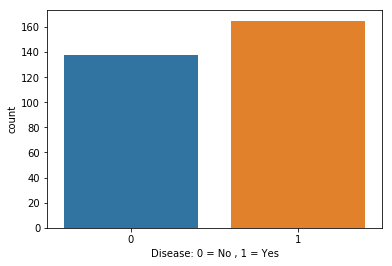

In [8]:
sns.countplot(x='target',data =data)
plt.xlabel("Disease: 0 = No , 1 = Yes")
plt.show()

In [9]:
countnoDisease = len(data[data.target== 0])
countyesDisease = len(data[data.target==1])
print("Percentage of Patients Have not Heart Disease: {:.2f}%".format((countnoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countyesDisease / (len(data.target))*100)))


Percentage of Patients Have not Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [10]:
#lets c in our data, how many are men and women
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

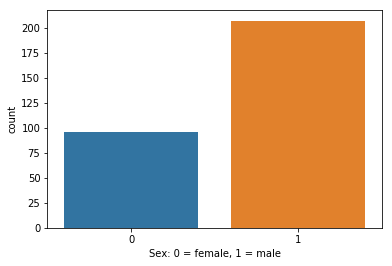

In [11]:
sns.countplot(x='sex',data =data)
plt.xlabel("Sex: 0 = female, 1 = male")
plt.show()

In [12]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [13]:
data.groupby('target').median()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,58,1,0,130,249,0,0,142,1,1.4,1,1,3
1,52,1,2,130,234,0,1,161,0,0.2,2,0,2


In [14]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


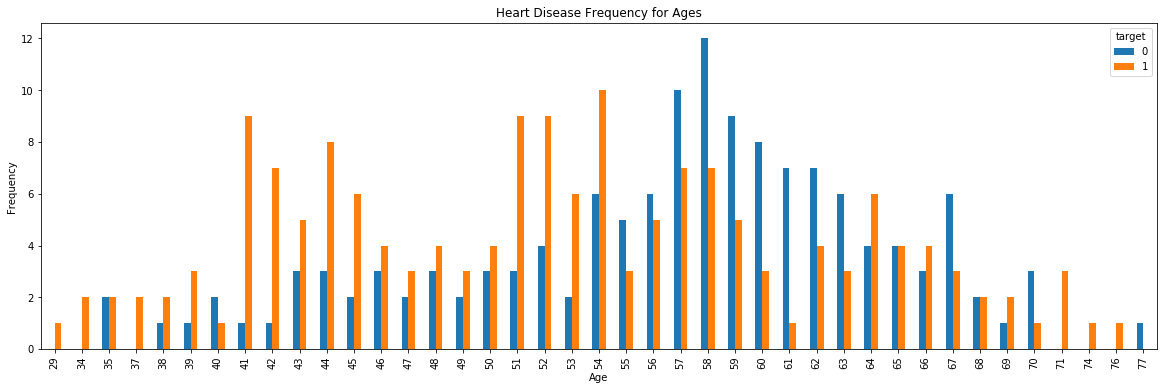

In [15]:
pd.crosstab(data.age, data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

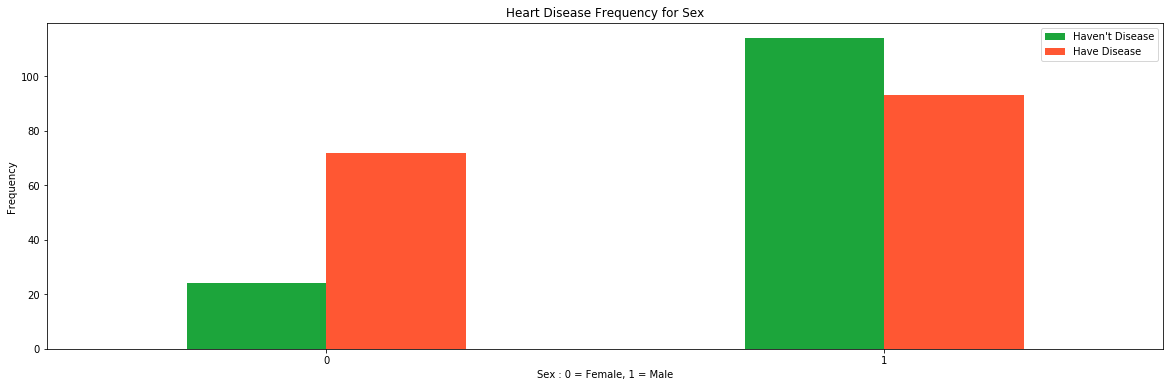

In [16]:
pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(20,6),color=['#1CA53B','#FF5733' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex : 0 = Female, 1 = Male')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

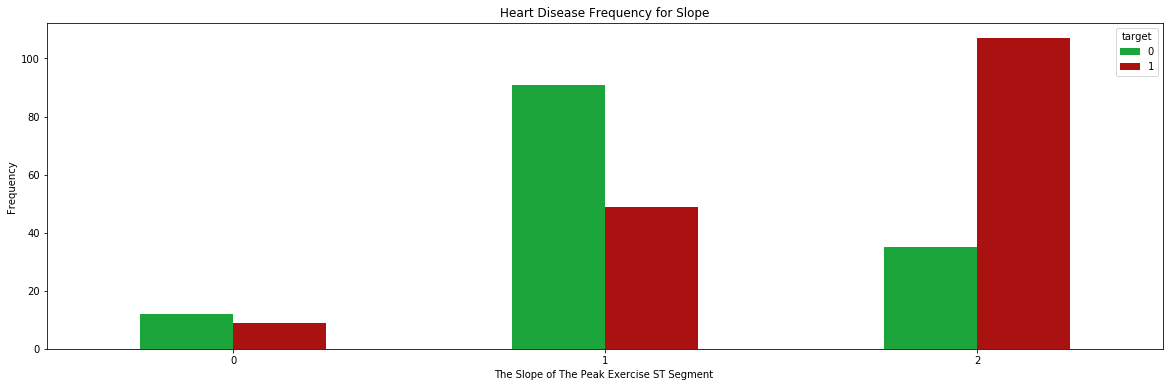

In [17]:
pd.crosstab(data.slope, data.target).plot(kind="bar",figsize=(20,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

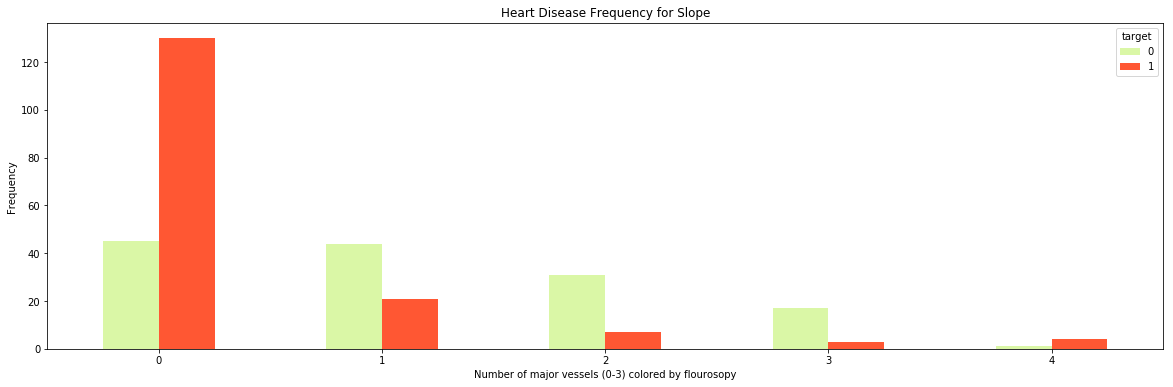

In [18]:
pd.crosstab(data.ca, data.target).plot(kind="bar",figsize=(20,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Number of major vessels (0-3) colored by flourosopy')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

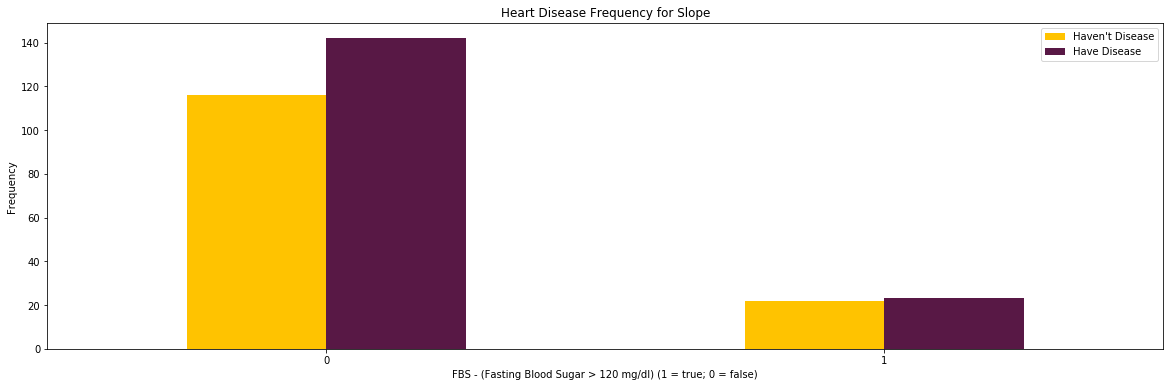

In [19]:
pd.crosstab(data.fbs, data.target).plot(kind="bar",figsize=(20,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

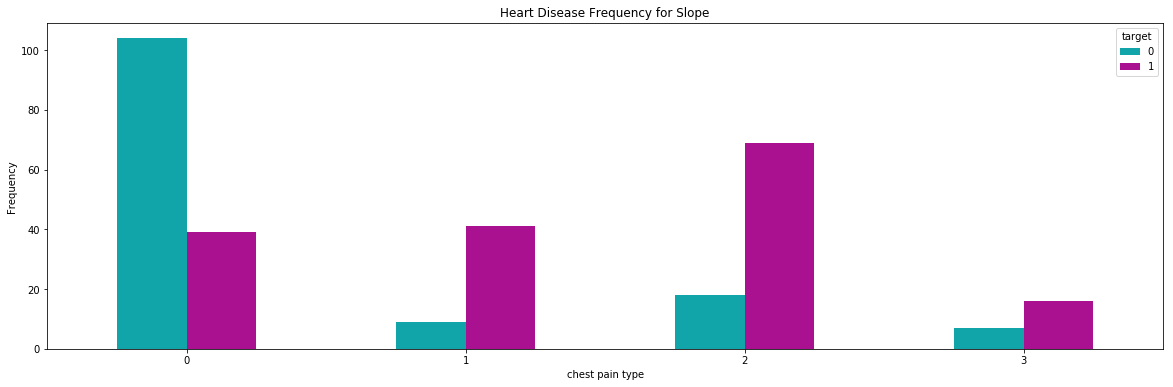

In [20]:
pd.crosstab(data.cp, data.target).plot(kind="bar",figsize=(20,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('chest pain type')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [21]:
# Creating Dummy Variables
# Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [22]:
frames = [data, a,b,c]
data = pd.concat(frames,axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [23]:
data.shape

(303, 25)

In [24]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
cp_0        False
cp_1        False
cp_2        False
cp_3        False
thal_0      False
thal_1      False
thal_2      False
thal_3      False
slope_0     False
slope_1     False
slope_2     False
dtype: bool

In [25]:
data = data.drop(columns = {'cp','thal','slope'})

In [26]:
data.shape

(303, 22)

In [27]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [28]:
# #Lets do classification
prediction_var = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca','cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']


In [29]:
train, test = train_test_split(data,test_size = 0.3)
print(train.shape)
print(test.shape)

(212, 22)
(91, 22)


In [30]:
train_X = train[prediction_var]
train_y = train.target

In [31]:
test_X = test[prediction_var]
test_y = test.target



In [32]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)



0.8131868131868132

In [33]:
#Now try with SVM 

model= svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

metrics.accuracy_score(prediction,test_y)

0.5714285714285714

In [34]:
def model(model,data,prediction,outcome):
    kf = KFold(data.shape[0],n_folds=10)



In [35]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)

    error = []
    for train, test in kf:

        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
    
        
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [36]:
model = DecisionTreeClassifier()
outcome_var= "target"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 70.492%
Cross-Validation Score : 63.934%
Cross-Validation Score : 65.574%
Cross-Validation Score : 67.514%
Cross-Validation Score : 66.011%


In [37]:
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)



Accuracy : 100.000%
Cross-Validation Score : 1.639%
Cross-Validation Score : 1.639%
Cross-Validation Score : 25.683%
Cross-Validation Score : 19.262%
Cross-Validation Score : 15.410%


In [38]:
model = RandomForestClassifier()
classification_model(model,data,prediction_var,outcome_var)



Accuracy : 99.010%
Cross-Validation Score : 67.213%
Cross-Validation Score : 66.393%
Cross-Validation Score : 71.038%
Cross-Validation Score : 70.362%
Cross-Validation Score : 67.623%


In [39]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)



Accuracy : 76.568%
Cross-Validation Score : 47.541%
Cross-Validation Score : 55.738%
Cross-Validation Score : 59.563%
Cross-Validation Score : 54.255%
Cross-Validation Score : 49.738%


In [40]:
model = LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)



Accuracy : 87.129%
Cross-Validation Score : 83.607%
Cross-Validation Score : 75.410%
Cross-Validation Score : 77.596%
Cross-Validation Score : 77.363%
Cross-Validation Score : 74.557%


In [41]:
model = GradientBoostingClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 99.010%
Cross-Validation Score : 77.049%
Cross-Validation Score : 67.213%
Cross-Validation Score : 72.678%
Cross-Validation Score : 74.092%
Cross-Validation Score : 71.273%


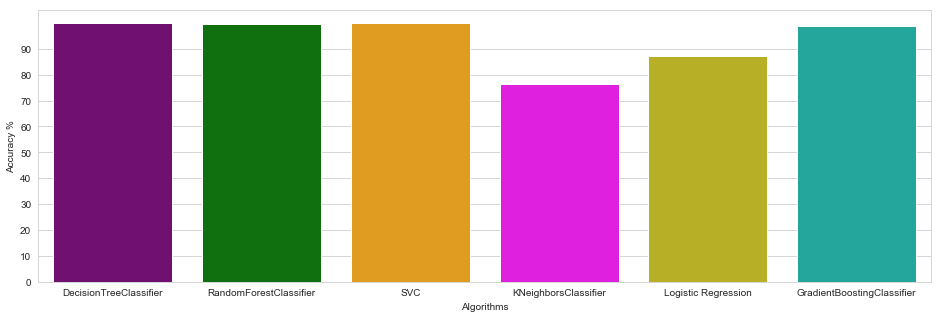

In [42]:
methods = ["DecisionTreeClassifier", "RandomForestClassifier", "SVC", "KNeighborsClassifier", "Logistic Regression", "GradientBoostingClassifier"]
accuracy = [100.000, 99.670, 100.000, 76.568,87.129, 99.010]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()